# minuteMETsNarrow_merged Dataset

Exploring & Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_file_path' with the actual path to your dataset
file_path = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/minuteMETsNarrow_merged.csv'
df_mets = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df_mets.head())

           Id         ActivityMinute  METs
0  1503960366  4/12/2016 12:00:00 AM    10
1  1503960366  4/12/2016 12:01:00 AM    10
2  1503960366  4/12/2016 12:02:00 AM    10
3  1503960366  4/12/2016 12:03:00 AM    10
4  1503960366  4/12/2016 12:04:00 AM    10


In [2]:
# Display basic information about the dataset
print(df_mets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB
None


In [4]:
# Check for missing values
print(df_mets.isnull().sum())

Id                0
ActivityMinute    0
METs              0
dtype: int64


In [5]:
# Handling missing values
# Drop rows with missing values
df_mets = df_mets.dropna()


In [6]:
# Explore unique values
print(df_mets['Id'].unique())
print(df_mets['ActivityMinute'].unique())
print(df_mets['METs'].unique())

[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]
['4/12/2016 12:00:00 AM' '4/12/2016 12:01:00 AM' '4/12/2016 12:02:00 AM'
 ... '5/12/2016 3:57:00 PM' '5/12/2016 3:58:00 PM' '5/12/2016 3:59:00 PM']
[ 10  12  26  32  36  30  28  34  24  76  85  97  99  90  40  66  78  58
  42  56  64  50  52  38  54  44  62  48  81  60  72  89  80  74  91  79
  68  70  83  88 107 111  86  93  82  92  95  87  84 103 101  96 109  98
 105 100  46  59  55  61  73  77  75  65  57 104 102   0  67  69  63  71
  20  18  16  22  14  15   6  11  13  45  53  39  33  41  37  94 120 126
 106  43  31 113 115 117  35 114  47  49 146 144 140 138 132 130 128 124
 122 110 136 121 119 108  51 112  29  27 149

Data Cleaning & Visualization:

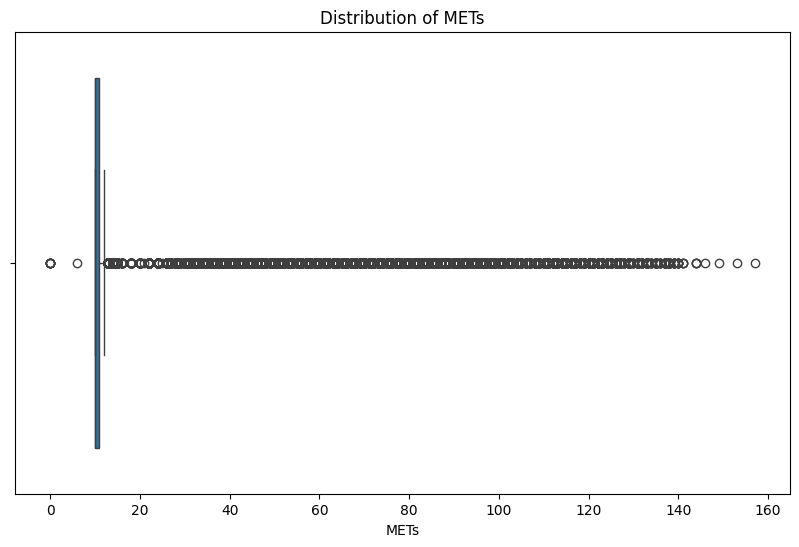

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='METs', data=df_mets)
plt.title('Distribution of METs')
plt.xlabel('METs')
plt.show()

Removing Outliers

In [8]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers, outliers

# Remove outliers for 'METs' column
df_mets_no_outliers, outliers_mets = remove_outliers_iqr(df_mets, 'METs')

# Display the removed outliers
print("Outliers:")
print(outliers_mets)

Outliers:
                 Id         ActivityMinute  METs
25       1503960366  4/12/2016 12:25:00 AM    26
29       1503960366  4/12/2016 12:29:00 AM    32
34       1503960366  4/12/2016 12:34:00 AM    36
35       1503960366  4/12/2016 12:35:00 AM    32
36       1503960366  4/12/2016 12:36:00 AM    26
...             ...                    ...   ...
1325556  8877689391   5/12/2016 1:36:00 PM    54
1325557  8877689391   5/12/2016 1:37:00 PM    74
1325558  8877689391   5/12/2016 1:38:00 PM    30
1325564  8877689391   5/12/2016 1:44:00 PM    28
1325565  8877689391   5/12/2016 1:45:00 PM    13

[250855 rows x 3 columns]


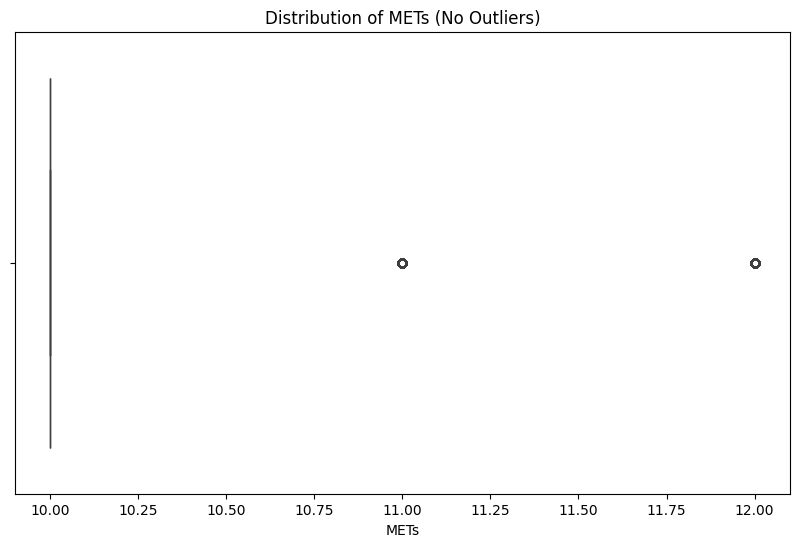

In [9]:
# Box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='METs', data=df_mets_no_outliers)
plt.title('Distribution of METs (No Outliers)')
plt.xlabel('METs')
plt.show()

In [10]:
# df_minute_intensities_wide is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteMETsNarrow_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
df_mets_no_outliers.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteMETsNarrow_merged_Filtered.csv
